In [59]:
#Load and clean data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
ecom = pd.read_csv('/content/ecommerce_dataset.csv')

Goal: Weekly acquisition cohorts.
Use Case:
"Track 90-day retention of new users from a mock e-commerce dataset. Identify drop-off patterns, segment by acquisition channel, and calculate cohort-level LTV.

In [61]:
#check for missingness and other issues
ecom.head()
ecom.isnull().sum()
#no missing values

#look at the underlying datatype and descriptive statistics
ecom.info()
ecom.describe()

#change signup_date and purchase_date to datetime
ecom['signup_date'] = pd.to_datetime(ecom['signup_date'])
ecom['purchase_date'] = pd.to_datetime(ecom['purchase_date'])

#Assign cohorts

#1. signup_date --> Month-Year
#logic - cohort = month-year eg ecom['cohort'] = extract month-year from ecom['signup_date']
ecom['cohort'] = ecom['signup_date'].dt.strftime('%m-%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5365 entries, 0 to 5364
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5365 non-null   int64  
 1   signup_date       5365 non-null   object 
 2   purchase_date     5365 non-null   object 
 3   amount            5365 non-null   float64
 4   channel           5365 non-null   object 
 5   product_category  5365 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 251.6+ KB


In [62]:
#2. Calculate week_since_signup
ecom['week_since_signup'] = (ecom['purchase_date'] - ecom['signup_date']) .dt.days // 7

In [63]:
#3. Build Retention Matrix
retention_matrix = ecom.pivot_table(index = 'cohort', columns = 'week_since_signup', values = 'user_id', aggfunc= 'count')
retention_matrix

week_since_signup,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
01-2024,691.0,518.0,365.0,273.0,165.0,134.0,87.0,61.0,53.0,18.0,8.0,3.0,1.0
02-2024,645.0,477.0,329.0,216.0,128.0,88.0,42.0,17.0,1.0,NaN,NaN,NaN,NaN
03-2024,554.0,311.0,124.0,55.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#4. Calculate Retention %, Total Revenue, LTV per Cohort


#logic = week [1] numbers/ week [0] numbers,....
#divides each value by the first column, row-wise
retention_rate = retention_matrix.divide(retention_matrix.iloc[:,0], axis = 0)
retention_rate

#total revenue
# sum amount for each cohort
total_revenue_by_cohort = ecom.groupby(['cohort'])['amount'].sum()
total_revenue_by_cohort

#LTV per cohort
#LTV per Cohort = Total Revenue from Cohort / Number of Users in Cohort
LTV_per_cohort = total_revenue_by_cohort / retention_matrix.iloc[:,0]
LTV_per_cohort

,0
cohort,
01-2024,374.794703
02-2024,312.278078
03-2024,216.163502


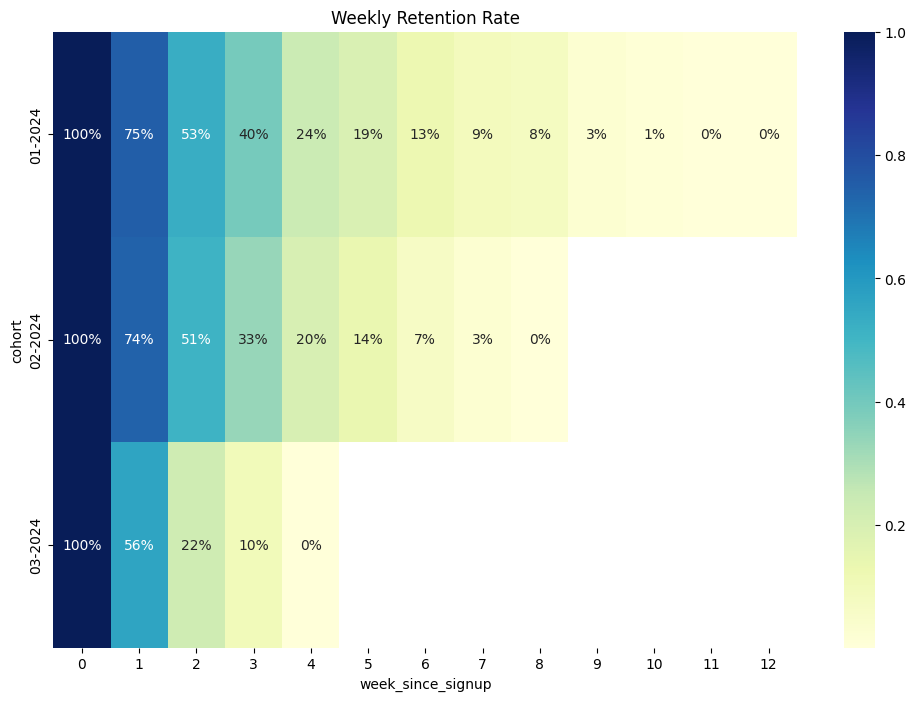

In [65]:
#Visualizations
plt.figure(figsize = (12,8))
sns.heatmap(retention_rate, cmap = 'YlGnBu', annot = True, fmt = '.0%')
plt.title('Weekly Retention Rate')
plt.show()

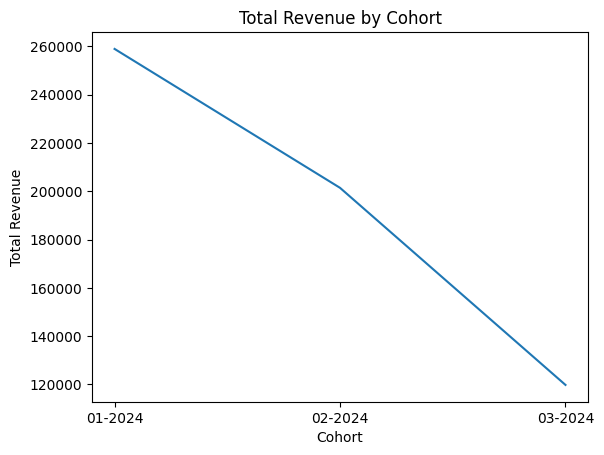

<Figure size 1200x800 with 0 Axes>

In [66]:
#line plot of revenue by cohort
plt.plot(total_revenue_by_cohort.index, total_revenue_by_cohort.values)
plt.title('Total Revenue by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Total Revenue')
plt.figure(figsize=(12,8))
plt.show()